In [1]:
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,iplot,plot

In [2]:
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df=pd.read_csv("matches.csv")

In [4]:
df

,Unnamed: 0,Season,Date,Home,xG,Home Goals,Away Goals,xG.1,Away,Attendance,Venue
0,0,2023/2024,2023-08-11,Burnley,0.3,0.0,3.0,1.9,Manchester City,21572.0,Turf Moor
1,1,2023/2024,2023-08-12,Arsenal,0.8,2.0,1.0,1.2,Nott'ham Forest,59984.0,Emirates Stadium
2,2,2023/2024,2023-08-12,Everton,2.7,0.0,1.0,1.5,Fulham,39940.0,Goodison Park
3,3,2023/2024,2023-08-12,Sheffield Utd,0.5,0.0,1.0,1.9,Crystal Palace,31194.0,Bramall Lane
4,4,2023/2024,2023-08-12,Brighton,4.0,4.0,1.0,1.5,Luton Town,31872.0,The American Express Community Stadium
...,...,...,...,...,...,...,...,...,...,...,...
60524,165,1888/1889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60525,166,1888/1889,1889-04-06,Stoke,NaN,1.0,1.0,NaN,Derby County,NaN,NaN
60526,167,1888/1889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60527,168,1888/1889,1889-04-14,Blackburn,NaN,3.0,0.0,NaN,Derby County,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60529 entries, 0 to 60528
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  60529 non-null  int64  
 1   Season      60529 non-null  object 
 2   Date        50568 non-null  object 
 3   Home        50568 non-null  object 
 4   xG          2660 non-null   float64
 5   Home Goals  50568 non-null  float64
 6   Away Goals  50568 non-null  float64
 7   xG.1        2660 non-null   float64
 8   Away        50568 non-null  object 
 9   Attendance  11446 non-null  float64
 10  Venue       12406 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 5.1+ MB


In [6]:
df.isna().sum()

Unnamed: 0        0
Season            0
Date           9961
Home           9961
xG            57869
Home Goals     9961
Away Goals     9961
xG.1          57869
Away           9961
Attendance    49083
Venue         48123
dtype: int64

<Axes: >

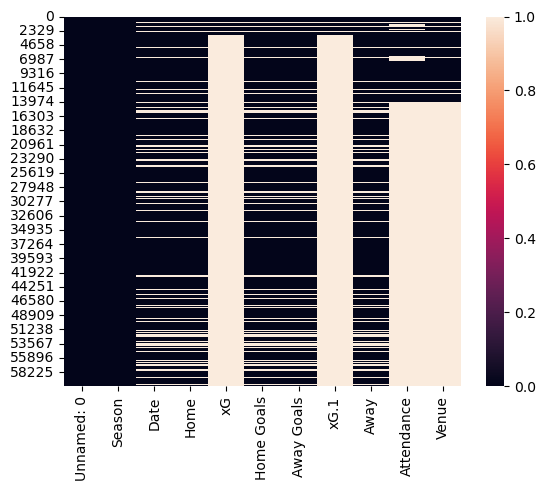

In [7]:
sns.heatmap(df.isna())

In [8]:
df.dropna(inplace=True)

In [9]:
df

,Unnamed: 0,Season,Date,Home,xG,Home Goals,Away Goals,xG.1,Away,Attendance,Venue
0,0,2023/2024,2023-08-11,Burnley,0.3,0.0,3.0,1.9,Manchester City,21572.0,Turf Moor
1,1,2023/2024,2023-08-12,Arsenal,0.8,2.0,1.0,1.2,Nott'ham Forest,59984.0,Emirates Stadium
2,2,2023/2024,2023-08-12,Everton,2.7,0.0,1.0,1.5,Fulham,39940.0,Goodison Park
3,3,2023/2024,2023-08-12,Sheffield Utd,0.5,0.0,1.0,1.9,Crystal Palace,31194.0,Bramall Lane
4,4,2023/2024,2023-08-12,Brighton,4.0,4.0,1.0,1.5,Luton Town,31872.0,The American Express Community Stadium
...,...,...,...,...,...,...,...,...,...,...,...
3003,418,2017/2018,2018-05-13,Huddersfield,1.7,0.0,1.0,2.0,Arsenal,24122.0,The John Smith's Stadium
3004,419,2017/2018,2018-05-13,Newcastle Utd,2.2,3.0,0.0,1.0,Chelsea,52294.0,St. James' Park
3005,420,2017/2018,2018-05-13,Manchester Utd,0.4,1.0,0.0,0.6,Watford,75049.0,Old Trafford
3006,421,2017/2018,2018-05-13,Southampton,0.5,0.0,1.0,0.8,Manchester City,31882.0,St. Mary's Stadium


In [10]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,Season,Date,Home,xG,Home Goals,Away Goals,xG.1,Away,Attendance,Venue
0,2023/2024,2023-08-11,Burnley,0.3,0.0,3.0,1.9,Manchester City,21572.0,Turf Moor
1,2023/2024,2023-08-12,Arsenal,0.8,2.0,1.0,1.2,Nott'ham Forest,59984.0,Emirates Stadium
2,2023/2024,2023-08-12,Everton,2.7,0.0,1.0,1.5,Fulham,39940.0,Goodison Park
3,2023/2024,2023-08-12,Sheffield Utd,0.5,0.0,1.0,1.9,Crystal Palace,31194.0,Bramall Lane
4,2023/2024,2023-08-12,Brighton,4.0,4.0,1.0,1.5,Luton Town,31872.0,The American Express Community Stadium
...,...,...,...,...,...,...,...,...,...,...
3003,2017/2018,2018-05-13,Huddersfield,1.7,0.0,1.0,2.0,Arsenal,24122.0,The John Smith's Stadium
3004,2017/2018,2018-05-13,Newcastle Utd,2.2,3.0,0.0,1.0,Chelsea,52294.0,St. James' Park
3005,2017/2018,2018-05-13,Manchester Utd,0.4,1.0,0.0,0.6,Watford,75049.0,Old Trafford
3006,2017/2018,2018-05-13,Southampton,0.5,0.0,1.0,0.8,Manchester City,31882.0,St. Mary's Stadium


In [11]:
df.shape
print("Row :",df.shape[0])
print("Column :",df.shape[1])

Row : 2219
Column : 10


In [12]:
d1= df["Season"]=="2023/2024"
d2= df["Home"]=="Manchester Utd"
man_united_home_df=df[d1 & d2]
man_united_home_df.reset_index(drop=True, inplace=True)
man_united_home_df

,Season,Date,Home,xG,Home Goals,Away Goals,xG.1,Away,Attendance,Venue
0,2023/2024,2023-08-14,Manchester Utd,2.2,1.0,0.0,2.2,Wolves,73358.0,Old Trafford
1,2023/2024,2023-08-26,Manchester Utd,2.8,3.0,2.0,1.2,Nott'ham Forest,73595.0,Old Trafford
2,2023/2024,2023-09-16,Manchester Utd,1.0,1.0,3.0,1.7,Brighton,73592.0,Old Trafford
3,2023/2024,2023-09-30,Manchester Utd,1.3,0.0,1.0,0.9,Crystal Palace,73428.0,Old Trafford
4,2023/2024,2023-10-07,Manchester Utd,1.4,2.0,1.0,0.9,Brentford,73453.0,Old Trafford
5,2023/2024,2023-10-29,Manchester Utd,0.9,0.0,3.0,4.0,Manchester City,73502.0,Old Trafford
6,2023/2024,2023-11-11,Manchester Utd,2.2,1.0,0.0,0.4,Luton Town,73599.0,Old Trafford
7,2023/2024,2023-12-06,Manchester Utd,4.1,2.0,1.0,1.5,Chelsea,73607.0,Old Trafford
8,2023/2024,2023-12-09,Manchester Utd,1.1,0.0,3.0,1.5,Bournemouth,73427.0,Old Trafford
9,2023/2024,2023-12-26,Manchester Utd,1.1,3.0,2.0,1.7,Aston Villa,73574.0,Old Trafford


In [13]:
d3= df["Season"]=="2023/2024"
d4= df["Away"]=="Manchester Utd"
man_united_away_df=df[d3 & d4]
man_united_away_df.reset_index(drop=True, inplace=True)
man_united_away_df

,Season,Date,Home,xG,Home Goals,Away Goals,xG.1,Away,Attendance,Venue
0,2023/2024,2023-08-19,Tottenham,1.7,2.0,0.0,2.1,Manchester Utd,61910.0,Tottenham Hotspur Stadium
1,2023/2024,2023-09-03,Arsenal,2.3,3.0,1.0,0.9,Manchester Utd,60192.0,Emirates Stadium
2,2023/2024,2023-09-23,Burnley,1.1,0.0,1.0,1.0,Manchester Utd,21593.0,Turf Moor
3,2023/2024,2023-10-21,Sheffield Utd,1.4,1.0,2.0,1.1,Manchester Utd,31543.0,Bramall Lane
4,2023/2024,2023-11-04,Fulham,1.0,0.0,1.0,0.7,Manchester Utd,24415.0,Craven Cottage
5,2023/2024,2023-11-26,Everton,2.4,0.0,3.0,2.2,Manchester Utd,39257.0,Goodison Park
6,2023/2024,2023-12-02,Newcastle Utd,2.4,1.0,0.0,0.5,Manchester Utd,52214.0,St James' Park
7,2023/2024,2023-12-17,Liverpool,2.3,0.0,0.0,0.8,Manchester Utd,57158.0,Anfield
8,2023/2024,2023-12-23,West Ham,1.2,2.0,0.0,1.0,Manchester Utd,64472.0,London Stadium
9,2023/2024,2023-12-30,Nott'ham Forest,0.7,2.0,1.0,0.8,Manchester Utd,29529.0,The City Ground


# Data Analysis and Visualisation

In [14]:
layout = go.Layout(
    title='Home Attendence of Manchester United 2023/24 Season.',
    xaxis=dict(
        title='Teams'
    ),
    yaxis=dict(
        title='Total Attendance'
    )
)
data=[go.Bar(
    x=man_united_home_df["Away"],  
    y=man_united_home_df["Attendance"],
     marker=dict(
        color='rgb(218, 41, 28)'  
    )
)]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [15]:
layout = go.Layout(
    title='Comparison of xG and Goals scored at Home',
    xaxis=dict(
        title='Teams'
    ),
    yaxis=dict(
        title='Goal scored'
    )
)
goal1 = go.Scatter(
    x=man_united_home_df["Away"],
    y=man_united_home_df["Home Goals"],
    name="Goal scored",
    marker=dict(color='rgb(148, 201, 115)')  
)

xg1 = go.Scatter(
   x=man_united_home_df["Away"],
   y=man_united_home_df["xG"],
   name="xG", 
   marker=dict(color='rgb(14, 134, 212)')  
)
data = [goal1,xg1]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [16]:
layout = go.Layout(
    title='Comparison of xGa and Goals conceded at Home',
    xaxis=dict(
        title='Teams'
    ),
    yaxis=dict(
        title='Goal conceded'
    )
)
goal2 = go.Scatter(
    x=man_united_home_df["Away"],
    y=man_united_home_df["Away Goals"],
    name="Goal conceded",
    marker=dict(color='rgb(255, 37, 17)')  
)

xg2 = go.Scatter(
   x=man_united_home_df["Away"],
   y=man_united_home_df["xG.1"],
   name="xGa", 
   marker=dict(color='rgb(14, 134, 212)') 
)
data = [goal2,xg2]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [17]:
layout=dict(
    title='Away Attendance When Manchester United Visit',
    xaxis=dict(
        title='Teams'
    ),
    yaxis=dict(
        title='Total Attendance'
    )
)
data=go.Bar(
    x=man_united_away_df["Home"],
    y=man_united_away_df["Attendance"],
    marker=dict(
        color='rgb(218, 41, 28)'  
    )
)
fig=go.Figure(data=data,layout=layout)
iplot(fig)

In [18]:
layout=dict(
    title='Comparison of xG and Goals scored Away From Home',
    xaxis=dict(
        title='Teams'
    ),
    yaxis=dict(
        title='Goal Scored'
    )
)
goal3=go.Scatter(
    x=man_united_away_df["Home"],
    y=man_united_away_df["Away Goals"],
    name="Goal Scored",
    marker=dict(
        color='rgb(148, 201, 115)'
    )
)
xg3= go.Scatter(
    x=man_united_away_df["Home"],
    y=man_united_away_df["xG.1"],
    name="xG",
    marker=dict(
        color='rgb(14, 134, 212)'
    )
)
data=[goal3,xg3]
fig=go.Figure(data=data,layout=layout)
iplot(fig)

In [19]:
layout=dict(
    title='Comparison of xGa and Goals conceded Away From Home',
    xaxis=dict(
        title='Teams'
    ),
    yaxis=dict(
        title='Goal Conceded'
    )
)
goal4=go.Scatter(
    x=man_united_away_df["Home"],
    y=man_united_away_df["Home Goals"],
    name="Goal Conceded",
    marker=dict(
        color='rgb(255, 37, 17)'
    )
)
xg4= go.Scatter(
    x=man_united_away_df["Home"],
    y=man_united_away_df["xG"],
    name="xGa",
    marker=dict(
        color='rgb(14, 134, 212)'
    )
)
data=[goal4,xg4]
fig=go.Figure(data=data,layout=layout)
iplot(fig)

## Lets see if Machester United Dominate games both in Home and Away or not.
### - In Football the team which has higher xG than the opponent is said to be dominating team


In [20]:
layout=dict(
    title="Comparison of xG of Manchester United and respective opponent at Manchester United's home.",
    xaxis=dict(
        title='Teams'
    ),
    yaxis=dict(
        title='xG Comparison'
    )
)
xg5=go.Scatter(
    x=man_united_home_df["Away"],
    y=man_united_home_df["xG"],
    name="xG of Manchester United",
    marker=dict(
        color='rgb(255, 37, 17)'
    )
)
xg6= go.Scatter(
    x=man_united_home_df["Away"],
    y=man_united_home_df["xG.1"],
    name="xG of Opponent",
    marker=dict(
        color='rgb(14, 134, 212)'
    )
)
data=[xg5,xg6]
fig=go.Figure(data=data,layout=layout)
iplot(fig)

In [21]:
layout=dict(
    title="Comparison of xG of Manchester United and respective opponent at Opponent's home.",
    xaxis=dict(
        title='Teams'
    ),
    yaxis=dict(
        title='xG Comparison'
    )
)
xg7=go.Scatter(
    x=man_united_away_df["Home"],
    y=man_united_away_df["xG.1"],
    name="xG of Manchester United",
    marker=dict(
        color='rgb(255, 37, 17)'
    )
)
xg8= go.Scatter(
    x=man_united_away_df["Home"],
    y=man_united_away_df["xG"],
    name="xG of Opponent",
    marker=dict(
        color='rgb(14, 134, 212)'
    )
)
data=[xg7,xg8]
fig=go.Figure(data=data,layout=layout)
iplot(fig)